In [1]:
import numpy as np
import matplotlib.pyplot as plt
from temp_glm_hmm import GLMHMMEstimator
from scipy.io import loadmat

In [2]:
num_samples = 5
num_states = 2
num_emissions = 2
num_feedbacks = 3
num_filter_bins = 30
num_steps = 1
filter_offset = 1

In [3]:
initial_simulation_variables = loadmat('initial_simulation_variables.mat')

X = []
y = []

for i in range(0, num_samples):
    X.append(initial_simulation_variables['X'][91 * i:91 * (i + 1), :])
    y.append(initial_simulation_variables['y'][i, :].astype(float))

In [4]:
estimator = GLMHMMEstimator(num_samples = num_samples, num_states = num_states, num_emissions = num_emissions, num_feedbacks = num_feedbacks, num_filter_bins = num_filter_bins, num_steps = num_steps, filter_offset = filter_offset)
estimator.fit(X, y, [], initial_simulation_variables['emit_w'], initial_simulation_variables['trans_w'])

Fitting iteration:   1
Fitting categorical emission filters
Fitting state transition filters
Log likelihood: 73057.25120492354
Fitting iteration:   2
Fitting categorical emission filters
Fitting state transition filters
Log likelihood: 73056.4301572468
Fitting iteration:   3
Fitting categorical emission filters
Fitting state transition filters
Log likelihood: 73056.14447099701
Change in log likelihood is below threshold!
FINISHED!


GLMHMMEstimator(AR_lambda=-1, AR_vec=array([510, 511, ..., 628, 629]),
        CV_regularize=False, GLM_emissions=True, GLM_transitions=True,
        L2_smooth=False, add_filters=False, analog_flag=False,
        anneal_lambda=False, auto_anneal=False,
        auto_anneal_schedule=array([ 1,  5,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
        auto_anneal_vec=array([0.01 , 0.025, 0.05 , 0.075, 0.1  , 0.25 , 0.5  , 0.75 , 1.   ]),
        cross_validate=False, emit_lambda=0, evaluate=False,
        filter_offset=1, fit_emissions=True, generate=False,
        get_error_bars=False, init_loglik=-10000000.0, max_iter=1000,
        num_emissions=1, num_feedbacks=3, num_filter_bins=30,
        num_samples=5, num_states=2, num_steps=1,
        output_filename='GLMHMM_output.mat',
        random_state=<mtrand.RandomState object at 0x000001EE60DB21B0>,
        smooth_lambda=0, stim_vec=array([  0,   1, ..., 509, 630]),
        symb_exists=True, tol=0.0001, train_bins=array([], dtype=float64),
 

In [5]:
data = loadmat('GLMHMM_output.mat')
emit_w_final = data['output'][0][-1]['emit_w'][0][0]
trans_w_final = data['output'][0][-1]['trans_w'][0][0]
print(emit_w_final.shape)
print(trans_w_final.shape)

(2, 1, 91)
(2, 2, 91)


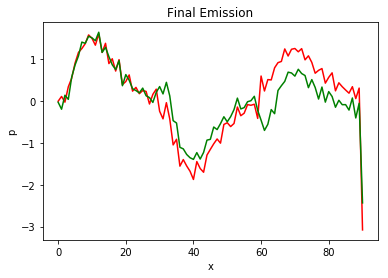

In [6]:
plt.figure()
plt.title("Final Emission")
plt.xlabel("x")
plt.ylabel("p")
plt.plot(range(0, 91), emit_w_final[0, 0, :], "-r")
plt.plot(range(0, 91), emit_w_final[1, 0, :], "-g")
plt.show()

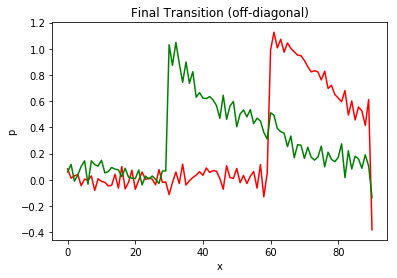

In [7]:
plt.figure()
plt.title("Final Transition (off-diagonal)")
plt.xlabel("x")
plt.ylabel("p")
plt.plot(range(0, 91), trans_w_final[0, 1, :], "-r")
plt.plot(range(0, 91), trans_w_final[1, 0, :], "-g")
plt.show()